In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [49]:
file_path = r"C:\Users\vehico\Documents\Thesis\Distance-project\OpenLayers\my-openlayers-project\public\data\aggregated_ps_by_municipality.csv"

df = pd.read_csv(file_path)
df = df.drop(columns=['Popolazione_totale'])
df['Comune'] = df['Comune'].str.upper()
df.head()

,Comune,mean_km,mean_min,St.Dv_km,St.Dv_min
0,ACCUMOLI,117.158476,105.762392,3.163532,5.371513
1,ACQUAFONDATA,48.996833,58.991307,2.000591,4.518840
2,ACQUAPENDENTE,42.213873,44.960063,6.130634,7.756047
3,ACUTO,27.655297,33.015642,1.150578,0.835981
4,AFFILE,27.038838,36.714829,1.272286,2.467075


In [50]:
path_age_csv = r"C:\Users\vehico\Documents\Thesis\Distance-project\Raw_data_processing\Raw_data\Lazio(IT1,22_289_DF_DCIS_POPRES1_15,1.0)_nuovo.csv"

df_age = pd.read_csv(path_age_csv, sep=';')

df_age.columns = df_age.columns.str.strip()
df_age['Territorio'] = df_age['Territorio'].str.upper()

df_age['pop_0_4'] = df_age[[f"{i} anni" for i in range(0, 5)]].sum(axis=1)
df_age['pop_5_14'] = df_age[[f"{i} anni" for i in range(5, 15)]].sum(axis=1)
df_age['pop_15_29'] = df_age[[f"{i} anni" for i in range(15, 30)]].sum(axis=1)
df_age['pop_30_64'] = df_age[[f"{i} anni" for i in range(30, 65)]].sum(axis=1)
df_age['pop_65_84'] = df_age[[f"{i} anni" for i in range(65, 85)]].sum(axis=1)

col_85_plus = [col for col in df_age.columns if col.startswith('85') or '100' in col]
df_age['pop_85_plus'] = df_age[col_85_plus].sum(axis=1)

df_age['pop_tot'] = df_age[[f"{i} anni" for i in range(0, 85)] + col_85_plus].sum(axis=1)

df_age_final = df_age[['Territorio', 'pop_0_4', 'pop_5_14', 'pop_15_29', 'pop_30_64', 'pop_65_84', 'pop_85_plus', 'pop_tot']]

df_age_final.head()

,Territorio,pop_0_4,pop_5_14,pop_15_29,pop_30_64,pop_65_84,pop_85_plus,pop_tot
0,ACQUAPENDENTE,143.0,366.0,709.0,2462.0,1279.0,54.0,5013.0
1,ARLENA DI CASTRO,26.0,55.0,102.0,354.0,234.0,6.0,777.0
2,BAGNOREGIO,91.0,211.0,424.0,1571.0,837.0,33.0,3167.0
3,BARBARANO ROMANO,37.0,50.0,103.0,499.0,238.0,7.0,934.0
4,BASSANO IN TEVERINA,33.0,85.0,173.0,632.0,314.0,6.0,1243.0


In [51]:
df_age_final = df_age_final.copy()
df_age_final['Territorio'] = df_age_final['Territorio'].str.upper().str.strip()
df_age_final = df_age_final.rename(columns={'Territorio': 'Comune'})

df = df.copy()
df['Comune'] = df['Comune'].str.upper().str.strip()

In [52]:
df_merged = df.merge(df_age_final, on='Comune', how='left')
df_merged.head()

,Comune,mean_km,mean_min,St.Dv_km,St.Dv_min,pop_0_4,pop_5_14,pop_15_29,pop_30_64,pop_65_84,pop_85_plus,pop_tot
0,ACCUMOLI,117.158476,105.762392,3.163532,5.371513,7.0,27.0,74.0,251.0,127.0,7.0,493.0
1,ACQUAFONDATA,48.996833,58.991307,2.000591,4.518840,4.0,12.0,23.0,141.0,62.0,1.0,243.0
2,ACQUAPENDENTE,42.213873,44.960063,6.130634,7.756047,143.0,366.0,709.0,2462.0,1279.0,54.0,5013.0
3,ACUTO,27.655297,33.015642,1.150578,0.835981,49.0,152.0,248.0,914.0,394.0,9.0,1766.0
4,AFFILE,27.038838,36.714829,1.272286,2.467075,43.0,110.0,188.0,671.0,331.0,10.0,1353.0


In [54]:
path_distanza = r"C:\Users\vehico\Documents\Thesis\Distance-project\Raw_data_processing\Raw_data\Distanza_Roma.csv"
df_distanze = pd.read_csv(path_distanza)

df_distanze.rename(columns={
    "InputID": "Comune",
    "Distance": "distance_to_roma"
}, inplace=True)

df_distanze['Comune'] = df_distanze['Comune'].str.upper()

df_merged['Comune'] = df_merged['Comune'].str.upper()
df_merged = df_merged.merge(df_distanze[['Comune', 'distance_to_roma']], on='Comune', how='left')
df_merged['distance_to_roma_km'] = df_merged['distance_to_roma'] / 1000
df_merged = df_merged.drop(columns=['distance_to_roma'])

In [46]:
df_merged.head()

,Comune,mean_km,mean_min,St.Dv_km,St.Dv_min,pop_0_4,pop_5_14,pop_15_29,pop_30_64,pop_65_84,pop_85_plus,pop_tot,distance_to_roma,distance_to_roma_km
0,ACCUMOLI,117.158476,105.762392,3.163532,5.371513,7.0,27.0,74.0,251.0,127.0,7.0,493.0,110774.642090,110.774642
1,ACQUAFONDATA,48.996833,58.991307,2.000591,4.518840,4.0,12.0,23.0,141.0,62.0,1.0,243.0,131360.730659,131.360731
2,ACQUAPENDENTE,42.213873,44.960063,6.130634,7.756047,143.0,366.0,709.0,2462.0,1279.0,54.0,5013.0,108307.569748,108.307570
3,ACUTO,27.655297,33.015642,1.150578,0.835981,49.0,152.0,248.0,914.0,394.0,9.0,1766.0,60215.092647,60.215093
4,AFFILE,27.038838,36.714829,1.272286,2.467075,43.0,110.0,188.0,671.0,331.0,10.0,1353.0,51642.039766,51.642040


In [56]:
density_path = r"C:\Users\vehico\Documents\Thesis\Distance-project\Raw_data_processing\Raw_data\Density.csv"

df_density = pd.read_csv(density_path, sep=';', header=None, usecols=[0, 4], names=['Comune', 'densita_pop_km2'])

df_density['Comune'] = df_density['Comune'].str.upper().str.strip()
df_density['densita_pop_km2'] = df_density['densita_pop_km2'].str.replace(',', '').astype(float)

df_merged['Comune'] = df_merged['Comune'].str.upper().str.strip()
df_merged = df_merged.merge(df_density, on='Comune', how='left')

In [57]:
df_merged.head()

,Comune,mean_km,mean_min,St.Dv_km,St.Dv_min,pop_0_4,pop_5_14,pop_15_29,pop_30_64,pop_65_84,pop_85_plus,pop_tot,distance_to_roma_km,densita_pop_km2
0,ACCUMOLI,117.158476,105.762392,3.163532,5.371513,7.0,27.0,74.0,251.0,127.0,7.0,493.0,110.774642,5.7
1,ACQUAFONDATA,48.996833,58.991307,2.000591,4.518840,4.0,12.0,23.0,141.0,62.0,1.0,243.0,131.360731,9.8
2,ACQUAPENDENTE,42.213873,44.960063,6.130634,7.756047,143.0,366.0,709.0,2462.0,1279.0,54.0,5013.0,108.307570,39.7
3,ACUTO,27.655297,33.015642,1.150578,0.835981,49.0,152.0,248.0,914.0,394.0,9.0,1766.0,60.215093,134.9
4,AFFILE,27.038838,36.714829,1.272286,2.467075,43.0,110.0,188.0,671.0,331.0,10.0,1353.0,51.642040,92.5


In [58]:
df_merged.isnull().sum()

Comune                  0
mean_km                 0
mean_min                0
St.Dv_km               63
St.Dv_min              63
pop_0_4                 0
pop_5_14                0
pop_15_29               0
pop_30_64               0
pop_65_84               0
pop_85_plus             0
pop_tot                 0
distance_to_roma_km     0
densita_pop_km2         0
dtype: int64

In [59]:
df_merged['St.Dv_km'].fillna(0, inplace=True)
df_merged['St.Dv_min'].fillna(0, inplace=True)

C:\Users\vehico\AppData\Local\Temp\ipykernel_7596\3095042183.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['St.Dv_km'].fillna(0, inplace=True)
C:\Users\vehico\AppData\Local\Temp\ipykernel_7596\3095042183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [60]:
df_merged.isnull().sum()

Comune                 0
mean_km                0
mean_min               0
St.Dv_km               0
St.Dv_min              0
pop_0_4                0
pop_5_14               0
pop_15_29              0
pop_30_64              0
pop_65_84              0
pop_85_plus            0
pop_tot                0
distance_to_roma_km    0
densita_pop_km2        0
dtype: int64

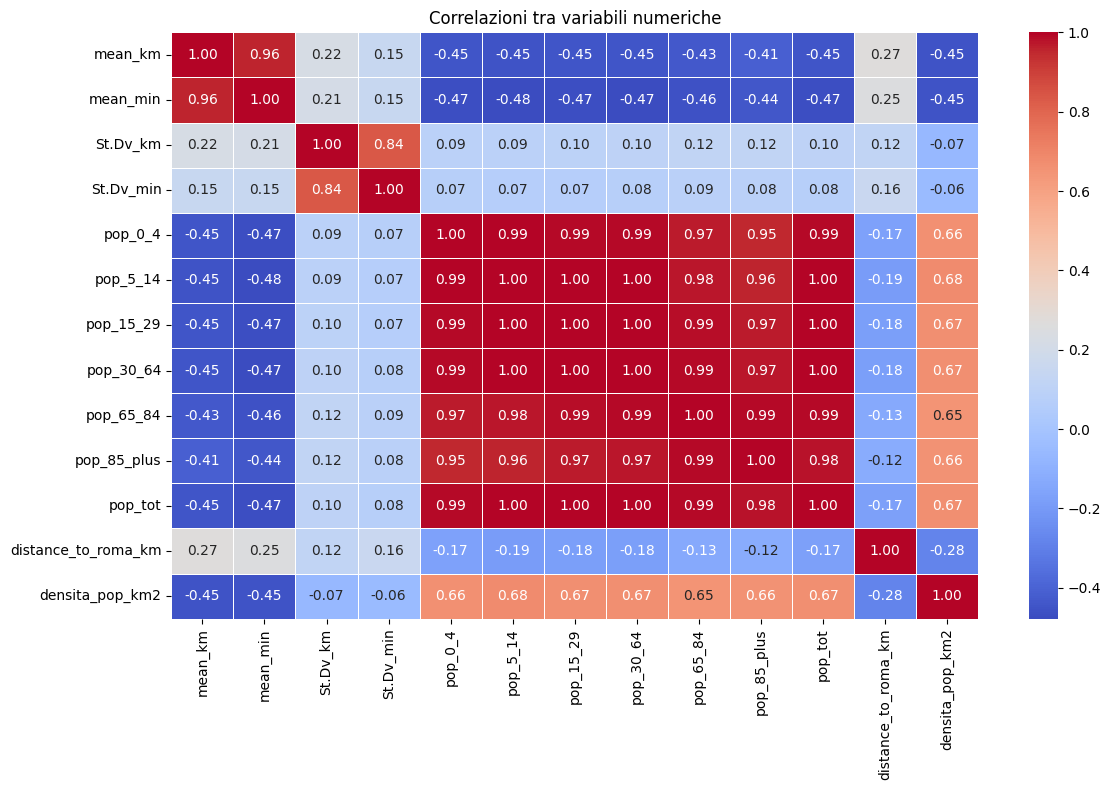

In [62]:
numeric_cols = df_merged.select_dtypes(include='number')

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlazioni tra variabili numeriche")
plt.tight_layout()
plt.show()

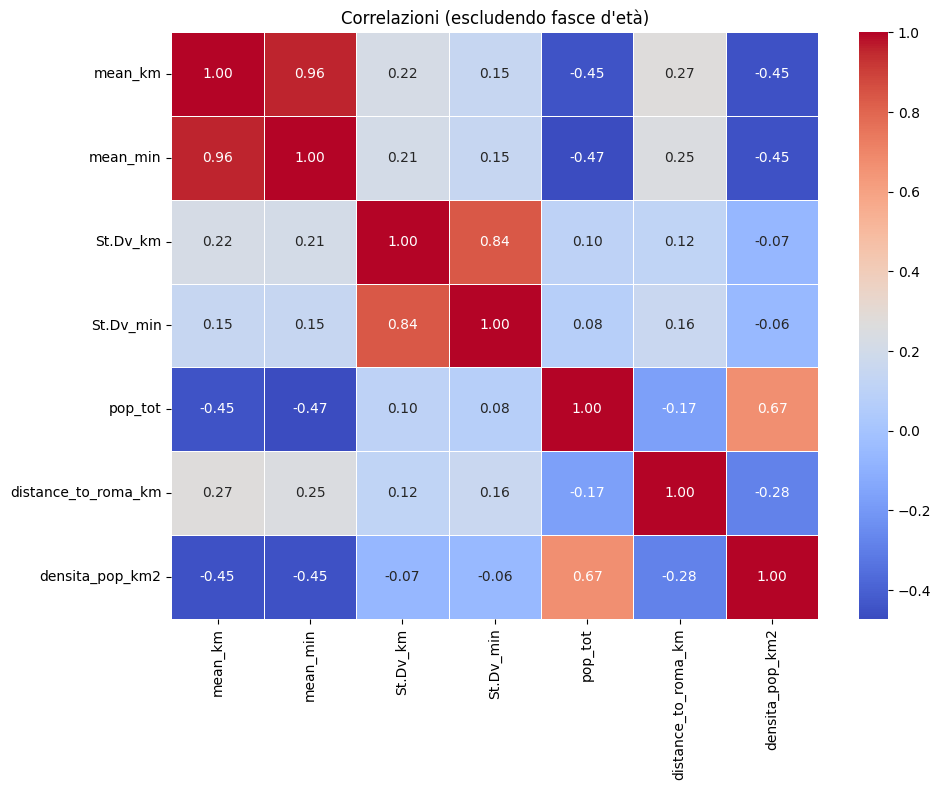

In [63]:
pop_cols = ['pop_0_4', 'pop_5_14', 'pop_15_29', 'pop_30_64', 'pop_65_84', 'pop_85_plus']

# 2. Seleziona solo colonne numeriche escluse quelle demografiche
numeric_cols = df_merged.select_dtypes(include='number').drop(columns=pop_cols, errors='ignore')

# 3. Matrice di correlazione
corr_matrix = numeric_cols.corr()

# 4. Plot della heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlazioni (escludendo fasce d'età)")
plt.tight_layout()
plt.show()

In [67]:
numeric_df = df_merged.select_dtypes(include='number').drop(columns=pop_cols, errors='ignore')

corr_matrix = numeric_df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

corr_matrix_masked = corr_matrix.mask(mask)
corr_pairs = corr_matrix_masked.stack().reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlation']

top5 = corr_pairs.sort_values(by='Correlation', ascending=False).head(10)

top5

,Var1,Var2,Correlation
0,mean_min,mean_km,0.957811
5,St.Dv_min,St.Dv_km,0.836427
19,densita_pop_km2,pop_tot,0.667663
7,pop_tot,mean_min,0.471424
16,densita_pop_km2,mean_min,0.453161
15,densita_pop_km2,mean_km,0.451257
6,pop_tot,mean_km,0.446759
20,densita_pop_km2,distance_to_roma_km,0.282484
10,distance_to_roma_km,mean_km,0.271372
11,distance_to_roma_km,mean_min,0.250488


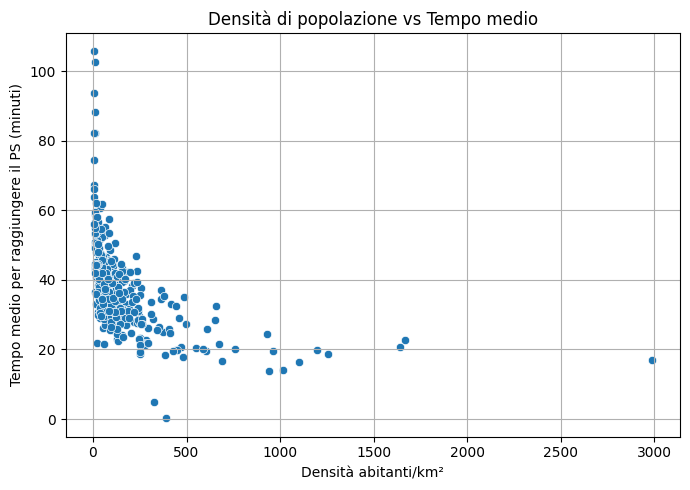

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_merged, x='densita_pop_km2', y='mean_min')
plt.title('Densità di popolazione vs Tempo medio')
plt.xlabel('Densità abitanti/km²')
plt.ylabel('Tempo medio per raggiungere il PS (minuti)')
plt.grid(True)
plt.tight_layout()
plt.show()


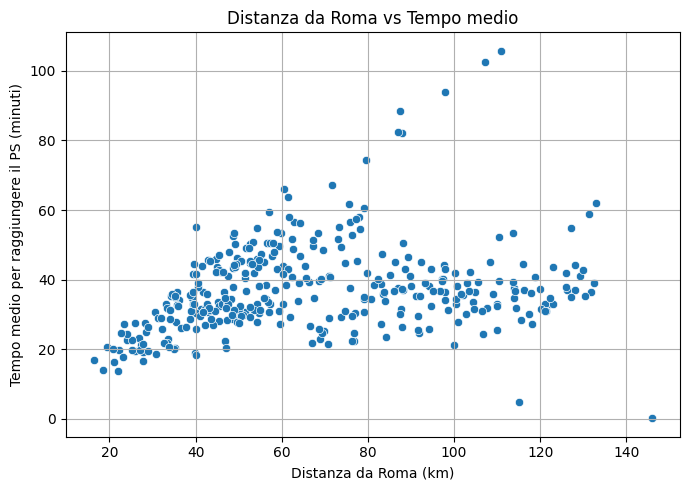

In [69]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_merged, x='distance_to_roma_km', y='mean_min')
plt.title('Distanza da Roma vs Tempo medio')
plt.xlabel('Distanza da Roma (km)')
plt.ylabel('Tempo medio per raggiungere il PS (minuti)')
plt.grid(True)
plt.tight_layout()
plt.show()


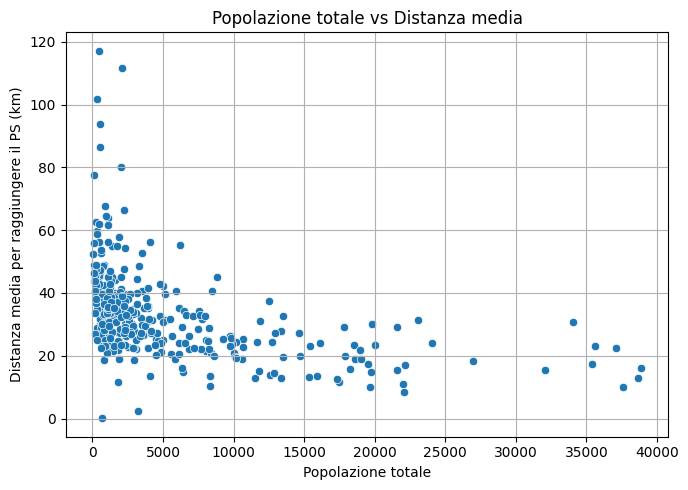

In [71]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_merged, x='pop_tot', y='mean_km')
plt.title('Popolazione totale vs Distanza media')
plt.xlabel('Popolazione totale')
plt.ylabel('Distanza media per raggiungere il PS (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

